# 네이버 뉴스 분석

## data load

In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("애플_news_20210109.pkl")

In [3]:
len(df)

1000

In [4]:
df[['title', 'description']].head(5)

title                                        description
0                               전남도, 모범 부동산중개업소 선정  도지사표창을 받은 모범공인중개사는 함평 함평천지공인중개사사무소 최준열, 여수 박정희...
1  3100도 뚫은 불타는 코스피에도 부산 상장사는 친환경차 부품사 외 큰 영향 없...  코스피 지수가 3000을 넘어 3100까지 뚫었지만 부산 소재 코스피 상장사들은 <...
2                            '단기 급등' 코스피, 숨고르기 할까?  이끌고 <b>애플</b>과 현대차의 자율주행 전기차 협력 소식에 현대차를 비롯한 국...
3                작년 4분기 삼성전자 환율에 ‘울고’ LG전자 車에 ‘웃고’  삼성전자가 스마트폰 경쟁에서 <b>애플</b>에게 밀린 것도 영향을 미쳤다. 삼성전...
4                       테슬라 시총 8300억 달러 돌파…페이스북 제쳐  미국 CNBC 방송은 테슬라가 페이스북을 추월한 데 이어 <b>애플</b>, 마이크...

In [5]:
df['content'] = df['title'] + df['description']

## pre processing(tokenize word)
- 형태소 분석기 설치
- 형태소 분석기 를 통한 명사 추출


### 형태소 분석기(KoNLPy) 설치 
[KoNLPy 설치](https://konlpy-ko.readthedocs.io/ko/v0.4.4/install/)

In [6]:
!pip3 install JPype1-py3 > /dev/null

In [7]:
!pip3 install konlpy > /dev/null

### 명사 추출

In [8]:
from konlpy.tag import Okt
okt = Okt()

- list type

In [9]:
# dataframe column to list
news_list = df['content'].tolist()

In [10]:
news_token = []
for news in news_list:
    news_token.append( okt.nouns(news))

In [11]:
news_token

[['전남도',
  '모범',
  '부동산',
  '중개업',
  '소',
  '선정',
  '도지사',
  '표창',
  '모범',
  '공인',
  '중개사',
  '함평',
  '함평천',
  '공인',
  '중개사',
  '사무소',
  '최준열',
  '여수',
  '박정희',
  '공인',
  '중개사',
  '사무소',
  '박정희',
  '장성',
  '애플',
  '공인',
  '중개사',
  '사무소',
  '박미경',
  '화순',
  '문란',
  '공인',
  '중개사',
  '사무소',
  '문란',
  '영',
  '광양'],
 ['도',
  '코스피',
  '부산',
  '상장',
  '친환',
  '경차',
  '부품',
  '사',
  '외',
  '영향',
  '코스피',
  '지수',
  '부산',
  '소재',
  '코스피',
  '상',
  '장사',
  '애플',
  '과',
  '현대차',
  '자율',
  '주행',
  '현대차',
  '모비스',
  '애플',
  '과',
  '자율',
  '주행',
  '전기차',
  '개발',
  '협력',
  '소식',
  '현대차'],
 ['단기',
  '급등',
  '코스피',
  '숨',
  '애플',
  '과',
  '현대차',
  '자율',
  '주행',
  '전기차',
  '협력',
  '소식',
  '현대차',
  '비롯',
  '국내',
  '자동차',
  '주',
  '급등',
  '뒷받침',
  '영향',
  '흐름',
  '것',
  '전망',
  '속',
  '미국',
  '블루',
  '웨이브',
  '수혜',
  '입',
  '수',
  '친환경'],
 ['작년',
  '삼성',
  '전자',
  '환율',
  '울',
  '전자',
  '전자',
  '스마트폰',
  '경쟁',
  '애플',
  '것',
  '영향',
  '전자',
  '작년',
  '분기',
  '판매량',
  '애플',
  '역전',
  '허용',
  '것',
  '전자',
  

- dataframe apply

In [12]:
 df['tokenize'] = df['content'].apply(okt.nouns) 

In [13]:
 df[['content', 'tokenize']]

content                                           tokenize
0    전남도, 모범 부동산중개업소 선정도지사표창을 받은 모범공인중개사는 함평 함평천지공인...  [전남도, 모범, 부동산, 중개업, 소, 선정, 도지사, 표창, 모범, 공인, 중개...
1    3100도 뚫은 불타는 코스피에도 부산 상장사는 친환경차 부품사 외 큰 영향 없.....  [도, 코스피, 부산, 상장, 친환, 경차, 부품, 사, 외, 영향, 코스피, 지수...
2    '단기 급등' 코스피, 숨고르기 할까?이끌고 <b>애플</b>과 현대차의 자율주행 ...  [단기, 급등, 코스피, 숨, 애플, 과, 현대차, 자율, 주행, 전기차, 협력, ...
3    작년 4분기 삼성전자 환율에 ‘울고’ LG전자 車에 ‘웃고’삼성전자가 스마트폰 경쟁...  [작년, 삼성, 전자, 환율, 울, 전자, 전자, 스마트폰, 경쟁, 애플, 것, 영...
4    테슬라 시총 8300억 달러 돌파…페이스북 제쳐미국 CNBC 방송은 테슬라가 페이스...  [테슬라, 총, 달러, 돌파, 페이스북, 제, 미국, 방송, 테슬라, 페이스북, 추...
..                                                 ...                                                ...
995  DB손보, '천만고객 감사 이벤트' 진행이벤트 경품으로는 엘지 오브제 컬렉션 냉장고...  [손보, 천만, 고객, 감사, 이벤트, 진행, 이벤트, 경품, 엘지, 오브, 제, ...
996  코스피 대형주 장세 계속될까<b>애플</b>과의 전기차 협업 소식으로 현대차는 전 ...  [코스피, 대형주, 장세, 계속, 애플, 전기차, 협업, 소식, 현대차, 전, 거래...
997  믿음직한 반도체·자동차…한국 증시 '레벨업'<b>애플</b>의 전기차인 '<b>애플...  [반도체, 자동차, 한국, 증시, 레벨, 업, 애플, 의, 전기차, 애플, 카, 를...
998  [뉴욕증시] 재정부양 강화 기대로 상승 출발....테슬라·트립어드바이저·플러...<...  [뉴욕증시, 재정부, 강화, 기대, 상승, 출발, 테슬라, 트립어드, 바이, 저, ...
999  현대차가 만드는 '<b>애플</b>카' 나오나… &quot;합작사도 가능해&quot...  [현대차, 애플, 카, 합작, 사도, 자동차, 미국, 애플, 의, 전기차, 관련, ...

[1000 rows x 2 columns]

## word2vec model 만들기

In [14]:
from gensim.models import Word2Vec

In [15]:
model = Word2Vec( df['tokenize'])

In [16]:
print(model)

Word2Vec(vocab=1024, size=100, alpha=0.025)


In [17]:
model.wv.index2word

['애플',
 '현대차',
 '대상',
 '테슬라',
 '전기차',
 '이',
 '음원',
 '카',
 '페이스북',
 '아마존',
 '위',
 '알파벳',
 '협력',
 '의',
 '지난해',
 '생산',
 '구글',
 '주가',
 '더',
 '총',
 '삼성',
 '자동차',
 '로',
 '등',
 '이민호',
 '영예',
 '것',
 '마이크로소프트',
 '아이폰',
 '은',
 '디지털',
 '심사',
 '골든디스크',
 '입증',
 '파친코',
 '촬영',
 '와중',
 '상자',
 '본상',
 '시가총액',
 '과',
 '방송',
 '전자',
 '기업',
 '킹',
 '영원',
 '군주',
 '한류',
 '스타',
 '저력',
 '가수',
 '축하',
 '명',
 '소식',
 '현재',
 '시작',
 '수',
 '추격',
 '그룹',
 '제',
 '를',
 '갤럭시',
 '논의',
 '자율',
 '모회사',
 '주행',
 '주',
 '이상',
 '전',
 '차',
 '상승',
 '출시',
 '어워즈',
 '오늘',
 '관련',
 '부문',
 '도',
 '추월',
 '데',
 '또',
 '임영웅',
 '세계',
 '글로벌',
 '스마트폰',
 '미래',
 '아이유',
 '미국',
 '개발',
 '중',
 '협업',
 '증시',
 '중국',
 '프로',
 '스마트',
 '설',
 '협의',
 '인텔',
 '반도체',
 '가격',
 '관심',
 '의회',
 '전략',
 '가운데',
 '바이두',
 '시리즈',
 '날',
 '중이',
 '코로나',
 '앱스토어',
 '최고',
 '제품',
 '돌파',
 '모바일',
 '가능성',
 '코스피',
 '지수',
 '업체',
 '난입',
 '위해',
 '새해',
 '모빌리티',
 '실적',
 '개',
 '주요',
 '주식',
 '가치',
 '기술',
 '테크',
 '회사',
 '대감',
 '급등',
 '통해',
 '진행',
 '계획',
 '시장',
 '블루',
 '달러',
 '회장',
 '이벤트',
 '기대',
 

### model save

In [18]:
model.save('애플.w2v')

## word2vec model 테스트

### model load

In [20]:
print(model_apple)

Word2Vec(vocab=1024, size=100, alpha=0.025)


In [21]:
model_apple.wv.most_similar('아이폰')

[('시리즈', 0.9993712902069092),
 ('전자', 0.9992691278457642),
 ('전략', 0.9992035031318665),
 ('갤럭시', 0.9991887807846069),
 ('노트', 0.9989868402481079),
 ('워치', 0.9989626407623291),
 ('한국', 0.9989352226257324),
 ('상한', 0.998934268951416),
 ('에어팟', 0.9989287853240967),
 ('대해', 0.9988983869552612)]

In [22]:
model_apple.wv.most_similar('충전기')

[('등', 0.99970942735672),
 ('끌', 0.9996970891952515),
 ('휴대폰', 0.9996634721755981),
 ('원대', 0.999610960483551),
 ('포함', 0.9996000528335571),
 ('블루', 0.9995971918106079),
 ('명절', 0.9995872974395752),
 ('통해', 0.9995869994163513),
 ('리', 0.9995808005332947),
 ('혁신', 0.9995800256729126)]

## word cloud

### wordcloud install

In [23]:
!pip3 install wordcloud > /dev/null

In [24]:
from  wordcloud import WordCloud

### 단어 추출

In [25]:
token_word_list = list()
for i in df['tokenize'].tolist():
    for j in i:
        token_word_list.append(j)

In [26]:
token_word = ' '.join(token_word_list)

In [27]:
token_word

'전남도 모범 부동산 중개업 소 선정 도지사 표창 모범 공인 중개사 함평 함평천 공인 중개사 사무소 최준열 여수 박정희 공인 중개사 사무소 박정희 장성 애플 공인 중개사 사무소 박미경 화순 문란 공인 중개사 사무소 문란 영 광양 도 코스피 부산 상장 친환 경차 부품 사 외 영향 코스피 지수 부산 소재 코스피 상 장사 애플 과 현대차 자율 주행 현대차 모비스 애플 과 자율 주행 전기차 개발 협력 소식 현대차 단기 급등 코스피 숨 애플 과 현대차 자율 주행 전기차 협력 소식 현대차 비롯 국내 자동차 주 급등 뒷받침 영향 흐름 것 전망 속 미국 블루 웨이브 수혜 입 수 친환경 작년 삼성 전자 환율 울 전자 전자 스마트폰 경쟁 애플 것 영향 전자 작년 분기 판매량 애플 역전 허용 것 전자 사업 부가 적자 대폭 축소 사업 본부 테슬라 총 달러 돌파 페이스북 제 미국 방송 테슬라 페이스북 추월 데 애플 마이크로소프트 아마존 구글 모회사 알파벳 추격 시작 전 또한 조 바이든 대통령 당선인 청정 에너지 계획 일환 골든디스크 음원 부문 영광 대상 지난해 더 킹 영원 군주 로 한류 스타 저력 입증 이민호 애플 파친코 촬영 와중 영예 대상 상자 가수 축하 디지털 음원 본상 심사 대상 인텔 삼성 전자 나노 칩 위탁 생산 협의 중 종합 인텔 고객 마이크로소프트 애플 도 인텔 의존 대신 직접 설계 반도체 파운드리 통해 생산 방식 상황 현재 전 세계 나노 이하 미세 공정은 테슬라 페이스북 제 총 위 아마존 알파벳 추격 방송 테슬라 페이스북 추월 데 애플 마이크로소프트 아마존 구글 모회사 알파벳 추격 시작 전 애플 은 시가총액 이상 현재 위 아마존 알파벳 테슬라 페북 제 총 위 이제 애플 도 테슬라 이제 애플 마이크로소프트 아마존 구글 모회사 알파벳 추격 시작 애플 은 시가총액 달러 이상 현재 위 아마존 알파벳 시가총액 달러 테슬라 주가 넘버스 최태원 회장 수소 야심 만년 적자 기업 돈 이유 블룸 에너지 글로벌 연료 전지 기업 애플 과 구글 등 메가와트 이상 연료 전지 공급 현재 국내 연

### 한글폰트 설치

In [28]:
!apt-get install fonts-nanum* -qq > /dev/null

In [29]:
wordcloud_apple = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', width=800, height=600 ).generate(token_word)

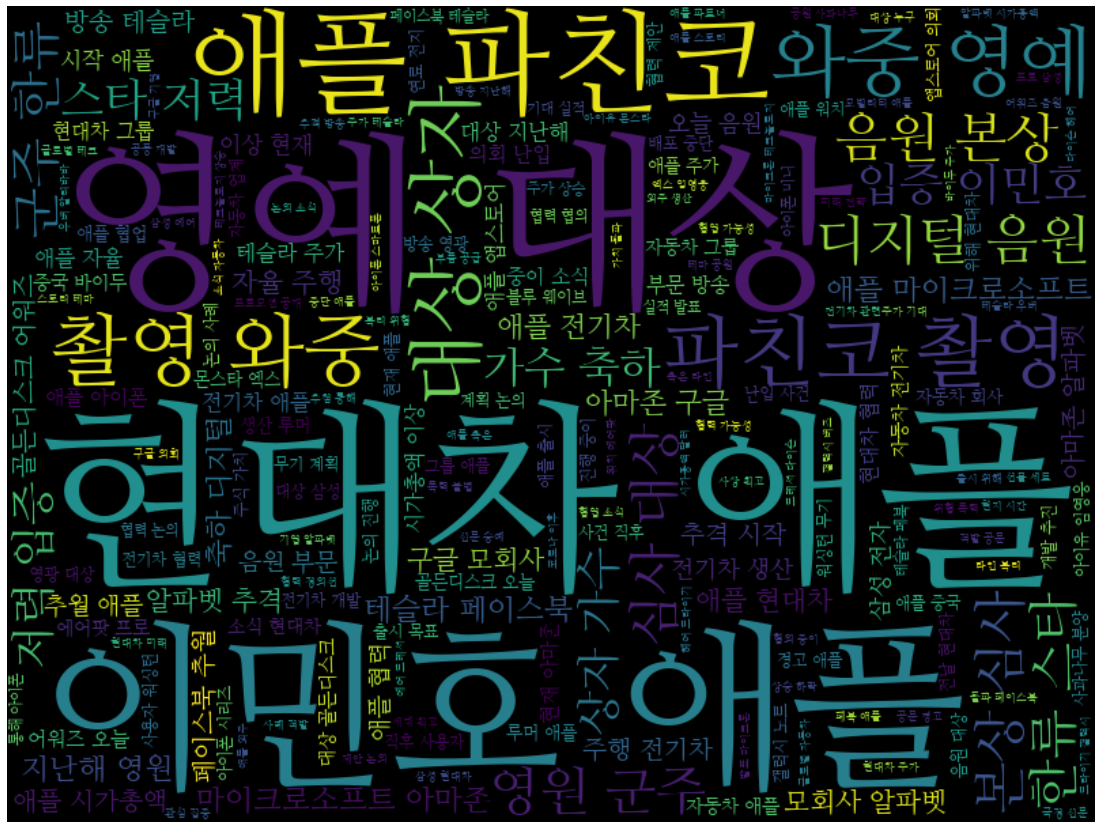

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
plt.imshow(wordcloud_apple, interpolation='bilinear')
plt.axis('off')
plt.show()

# 실습

## 3교시에 생성한 삼성 뉴스를 load하여 
- word2vec 모델을 생성하고, 
- wordcloud를 생성합니다

In [35]:
df = pd.read_pickle("삼성_news_20210109.pkl")

In [36]:
len(df)

1000

In [37]:
df[['title', 'description']].head(5)

title                                        description
0                  한국폴리텍대학 반도체융합캠퍼스 2021학년도 신입생 정시모집  아울러 반도체융합캠퍼스는 <b>삼성</b>반도체 평택캠퍼스, SK하이닉스 용인 반도...
1                         [프리뷰] LG의 눈물 속에 탄생한 SK하이닉스  -기업 운명을 바꾼 M&amp;A 나비효과① -<b>삼성</b>·LG가 자동차·반도...
2  <b>삼성</b>전자, 주가 또 오를까…&quot;인텔, 7나노칩 위탁생산 협의&q...  다음 주 국내 증시에서 대장주 <b>삼성</b>전자의 주가 움직임에 관심이 커진다....
3                 2020 ACL 최고의 수비수 투표 시작…김기희, 김민재 후보  김기희(울산)와 민상기(수원 <b>삼성</b>)가 이름을 올린 가운데 한국 대표팀 ...
4                        ‘레전드’ 데얀, K리그 떠난다… 홍콩 킷치 이적  킷치엔 수원 <b>삼성</b> 출신의 한국인 수비수 박준형이 뛰고 있기도 하다. 데...

In [39]:
df['content'] = df['title'] + df['description']

In [40]:
news_list = df['content'].tolist()

In [41]:
news_token = []
for news in news_list:
    news_token.append( okt.nouns(news))

In [42]:
news_token

[['한국',
  '폴리텍',
  '대학',
  '반도체',
  '융합',
  '캠퍼스',
  '학년',
  '신입생',
  '정시',
  '모집',
  '반도체',
  '융합',
  '캠퍼스',
  '삼성',
  '반도체',
  '평택',
  '캠퍼스',
  '하이닉스',
  '용인',
  '반도체',
  '협력',
  '지구',
  '클러스터',
  '산학',
  '간',
  '시너지',
  '효과',
  '낼',
  '수',
  '것',
  '기대',
  '한국',
  '폴리텍',
  '대학',
  '한국',
  '반도체',
  '산업',
  '협회',
  '의견'],
 ['프리뷰',
  '의',
  '눈물',
  '속',
  '탄생',
  '하이닉스',
  '기업',
  '운명',
  '나비효과',
  '삼성',
  '자동차',
  '반도체',
  '포기',
  '속사정',
  '한경비즈니스',
  '안',
  '옥희',
  '기자',
  '삼성',
  '의',
  '운명',
  '현대차',
  '기아차',
  '인수',
  '현대차',
  '기아차',
  '인수',
  '현대차',
  '삼성',
  '대우',
  '기아',
  '산업',
  '등',
  '개'],
 ['삼성',
  '전자',
  '주가',
  '또',
  '인텔',
  '나노',
  '칩',
  '위탁',
  '생산',
  '협의',
  '다음',
  '주',
  '국내',
  '증시',
  '장주',
  '삼성',
  '전자',
  '주가',
  '움직임',
  '관심',
  '인텔',
  '한국',
  '삼성',
  '전자',
  '대만',
  '로부터',
  '제품',
  '위탁',
  '생산',
  '방안',
  '협의',
  '것',
  '현지',
  '시간',
  '블룸버그',
  '통신'],
 ['최고',
  '수비수',
  '투표',
  '시작',
  '김기희',
  '김민재',
  '후보',
  '김기희',
  '울산',
  '민상기',
  '수원',
  '삼성',
 

In [43]:
 df['tokenize'] = df['content'].apply(okt.nouns) 

In [44]:
 df[['content', 'tokenize']]

content                                           tokenize
0    한국폴리텍대학 반도체융합캠퍼스 2021학년도 신입생 정시모집아울러 반도체융합캠퍼스는...  [한국, 폴리텍, 대학, 반도체, 융합, 캠퍼스, 학년, 신입생, 정시, 모집, 반...
1    [프리뷰] LG의 눈물 속에 탄생한 SK하이닉스-기업 운명을 바꾼 M&amp;A 나...  [프리뷰, 의, 눈물, 속, 탄생, 하이닉스, 기업, 운명, 나비효과, 삼성, 자동...
2    <b>삼성</b>전자, 주가 또 오를까…&quot;인텔, 7나노칩 위탁생산 협의&q...  [삼성, 전자, 주가, 또, 인텔, 나노, 칩, 위탁, 생산, 협의, 다음, 주, ...
3    2020 ACL 최고의 수비수 투표 시작…김기희, 김민재 후보김기희(울산)와 민상기...  [최고, 수비수, 투표, 시작, 김기희, 김민재, 후보, 김기희, 울산, 민상기, ...
4    ‘레전드’ 데얀, K리그 떠난다… 홍콩 킷치 이적킷치엔 수원 <b>삼성</b> 출신...  [레전드, 데얀, 리그, 홍콩, 킷치, 이적킷치, 수원, 삼성, 출신, 한국인, 수...
..                                                 ...                                                ...
995  <b>삼성</b>전자 3개 제품, 베트남서 '우수한' 9개 디지털제품에 선정…테크 ...  [삼성, 전자, 개, 제품, 베트남, 개, 디지털제품, 선정, 테크, 어워드, 삼성...
996  <b>삼성</b>전자, 2020년 4분기 연결기준 매출 61조원<b>삼성</b>전자...  [삼성, 전자, 연결, 기준, 매출, 삼성, 전자, 연결, 기준, 매출, 영업, 이...
997  양준혁, 박현선과의 결혼식 앞두고 사회-주례 등에 관심↑…축가가수는 이찬원주례는 <...  [양준혁, 박현선, 결혼식, 사회, 주례, 등, 관심, 축가, 가수, 이찬원, 주례...
998  '166억원' 쏜 두산, 'FA 엑소더스'는 없다?김재호, 허경민, 정수빈은 두산에...  [두산, 엑소더스, 김재호, 허경민, 정수빈, 두산, 잔류, 최주환, 와이번스, 오...
999  [해외 한국기업 이슈](1월 9일) 한수원, 2000억원 규모 인도네시아 카리안 식...  [해외, 한국, 기업, 이슈, 한수원, 규모, 인도네시아, 카리, 안, 식, 상승,...

[1000 rows x 2 columns]

In [45]:
model = Word2Vec( df['tokenize'])

In [46]:
print(model)

Word2Vec(vocab=1426, size=100, alpha=0.025)


In [47]:
model.wv.index2word

['삼성',
 '전자',
 '등',
 '한국',
 '이',
 '제품',
 '지난해',
 '갤럭시',
 '증권',
 '기업',
 '생산',
 '행사',
 '코로나',
 '차',
 '사업',
 '전',
 '위',
 '의',
 '공개',
 '위탁',
 '방문',
 '것',
 '현대차',
 '팀',
 '진행',
 '개',
 '라이온즈',
 '협의',
 '리그',
 '시장',
 '영업',
 '코스피',
 '부산',
 '과',
 '가구',
 '롯데',
 '김상수',
 '모델',
 '실적',
 '시작',
 '종목',
 '현대',
 '구자욱',
 '업체',
 '우디',
 '가격',
 '매출',
 '국내',
 '수원',
 '수',
 '선정',
 '이익',
 '그',
 '가운데',
 '이번',
 '중',
 '자동차',
 '로부터',
 '테슬라',
 '회장',
 '경우',
 '투자',
 '바이오',
 '이후',
 '단지',
 '후',
 '사은',
 '광주',
 '경제',
 '분양',
 '상의',
 '중공업',
 '올해',
 '사진',
 '경기',
 '인텔',
 '전략',
 '외국인',
 '기록',
 '보험',
 '하이닉스',
 '산업',
 '주',
 '방안',
 '시간',
 '감독',
 '평택',
 '최고',
 '스마트폰',
 '로',
 '시즌',
 '루헨퍼니처',
 '및',
 '구매',
 '매장',
 '최대',
 '주식',
 '화학',
 '날',
 '소속',
 '미래',
 '지역',
 '덕',
 '공항',
 '시세',
 '교체',
 '글로벌',
 '도',
 '녹색',
 '통해',
 '생명',
 '반도체',
 '르노',
 '발표',
 '를',
 '두',
 '서울',
 '상위',
 '뒤',
 '직스',
 '정보',
 '대통령',
 '일산',
 '시',
 '공식',
 '최근',
 '주요',
 '브랜드',
 '앞서',
 '인터뷰',
 '위해',
 '에듀윌',
 '점',
 '일자리',
 '중고차',
 '시리즈',
 '중국',
 '추가',
 '기자',
 '선수',
 '팩',
 '조선',


In [51]:
model.save('삼성.w2v')

In [52]:
print(model_samsung)

Word2Vec(vocab=1024, size=100, alpha=0.025)


In [53]:
model_apple.wv.most_similar('갤럭시')

[('무선', 0.9994784593582153),
 ('시리즈', 0.9994624257087708),
 ('덱스', 0.9993583559989929),
 ('전략', 0.9993292093276978),
 ('중', 0.9992671012878418),
 ('아이폰', 0.9991887211799622),
 ('라면', 0.9991858005523682),
 ('모델', 0.9991574287414551),
 ('지원', 0.9991019368171692),
 ('미니', 0.9990988969802856)]

In [54]:
model_apple.wv.most_similar('충전기')

[('등', 0.99970942735672),
 ('끌', 0.9996970891952515),
 ('휴대폰', 0.9996634721755981),
 ('원대', 0.999610960483551),
 ('포함', 0.9996000528335571),
 ('블루', 0.9995971918106079),
 ('명절', 0.9995872974395752),
 ('통해', 0.9995869994163513),
 ('리', 0.9995808005332947),
 ('혁신', 0.9995800256729126)]

In [55]:
token_word_list = list()
for i in df['tokenize'].tolist():
    for j in i:
        token_word_list.append(j)

In [56]:
token_word = ' '.join(token_word_list)

In [57]:
token_word

'한국 폴리텍 대학 반도체 융합 캠퍼스 학년 신입생 정시 모집 반도체 융합 캠퍼스 삼성 반도체 평택 캠퍼스 하이닉스 용인 반도체 협력 지구 클러스터 산학 간 시너지 효과 낼 수 것 기대 한국 폴리텍 대학 한국 반도체 산업 협회 의견 프리뷰 의 눈물 속 탄생 하이닉스 기업 운명 나비효과 삼성 자동차 반도체 포기 속사정 한경비즈니스 안 옥희 기자 삼성 의 운명 현대차 기아차 인수 현대차 기아차 인수 현대차 삼성 대우 기아 산업 등 개 삼성 전자 주가 또 인텔 나노 칩 위탁 생산 협의 다음 주 국내 증시 장주 삼성 전자 주가 움직임 관심 인텔 한국 삼성 전자 대만 로부터 제품 위탁 생산 방안 협의 것 현지 시간 블룸버그 통신 최고 수비수 투표 시작 김기희 김민재 후보 김기희 울산 민상기 수원 삼성 이름 가운데 한국 대표팀 주전 중앙 수비수 김민재 베이징 궈안 가세 위 양 베이징 궈안 호세 카나 칼리 흐 이상 페르세폴리스 경쟁 레전드 데얀 리그 홍콩 킷치 이적킷치 수원 삼성 출신 한국인 수비수 박준형 데얀 명실 상부 리그 레전드 외국인 선수 관련 기록 대부분 데얀 거머쥐 리그 연속 득점 차지 코로나 그랜저 수 자동차 시장 변화 사진 미디어 펜 현대차 기아 자동차 한국 지엠 르노 삼성 자동차 신차 효과 개별 소비 세 소비 진작 효과 년 대비 판매 반면 지난해 풀 체인지 완전 변경 급 신차 환경 먼저 생각 삼성 전자 경기 평택 캠퍼스 녹색 기업 선정 삼성 전자 평택 캠퍼스 전경 사진 제공 삼성 전자 아시아 뉴스 통신 강 기성 기자 삼성 전자 평택 캠퍼스 환경부 로부터 녹색 기업 선정 녹색 기업 이란 제정 탄소 녹색 성장 김기희 김민재 최고 수비수 누구 김기희 울산 민상기 수원 삼성 이름 가운데 한국 대표팀 주전 중앙 수비수 김민재 베이징 궈안 가세 위 양 베이징 궈안 호세 카나 칼리 흐 이상 페르세폴리스 경쟁 스토리 조선 사 올해 대규모 수주 조선 가격 인상 꽃길 한국 조선해 삼성 중공업 대우조선 해양 올해 대규모 수주 조선 가격 인상 등 두 마리 토끼 달성 수 추가 주

In [58]:
wordcloud_samsung = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', width=800, height=600 ).generate(token_word)

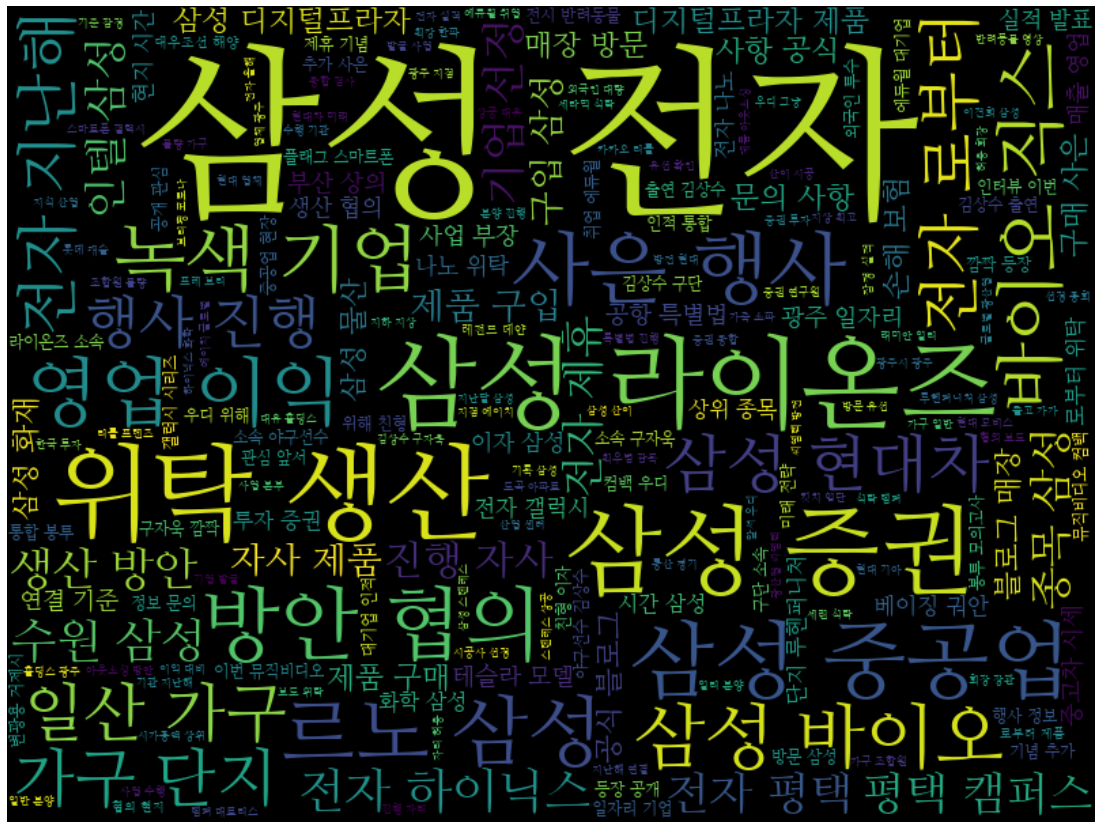

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
plt.imshow(wordcloud_samsung, interpolation='bilinear')
plt.axis('off')
plt.show()